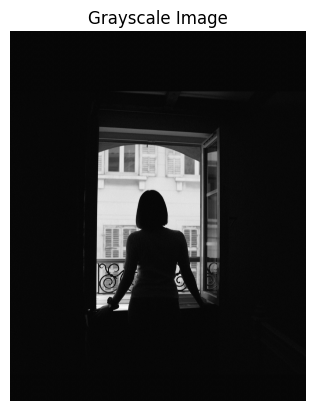

Otsu Threshold Value: 101.0


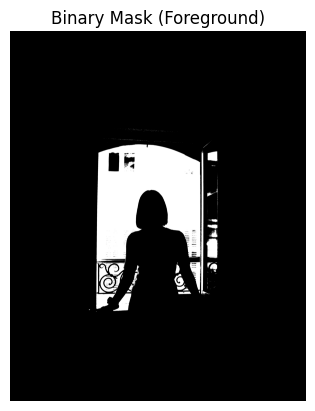

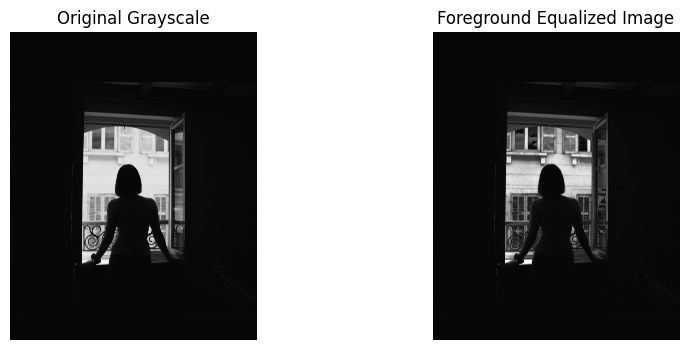

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load image
image_path = "../data/original/looking_out.jpg"
img_bgr = cv2.imread(image_path)

if img_bgr is None:
    raise FileNotFoundError("Image not found")

# Convert to grayscale
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Apply Otsu thresholding
threshold_value, binary_mask = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

print("Otsu Threshold Value:", threshold_value)

plt.imshow(binary_mask, cmap='gray')
plt.title("Binary Mask (Foreground)")
plt.axis("off")
plt.show()

def histogram_equalization(img):
    flat = img.flatten()
    hist = np.zeros(256)

    for p in flat:
        hist[p] += 1

    pdf = hist / flat.size
    cdf = np.cumsum(pdf)
    transform = np.round(cdf * 255).astype(np.uint8)

    return transform[img]

# Copy grayscale image
foreground_eq = gray.copy()

# Foreground mask (white regions)
mask = binary_mask == 255

# Apply histogram equalization only on foreground pixels
foreground_eq[mask] = histogram_equalization(gray[mask])

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(foreground_eq, cmap='gray')
plt.title("Foreground Equalized Image")
plt.axis("off")

plt.show()
